### ESPM88a Spring 2017

# TEACHER INFO

## Instructions for reviewing lab in class
- Distribute the student version and answerkey to the students.
- Open both versions in a browser.
- Show the students the student version on the overhead. 
- Keep the answerkey in a non-visible browser tab for your reference.
- Go through as much of the lab as you can in class with students.
- Give the students time to work on the challenge questions and then discuss in class
- You can display the answers from the answerkey version of the notebook (this).
- Students can have the answerkey but they should work through the student version first. 
<hr/>

# Lab 6. Mapping Points


### Learning goals
This notebook explores the different techniques for mapping geographic data represented as points as well as some of the types of questions can be asked of these.

###  Instructions
Work through the content of this lab. Any questions contained in this notebook are thought exercises unless they are explicitly referenced in the homework notebook. Only submit answers to the questions in the homework notebook.

#### What to Submit
- Get started on Homework 6 when you are done with Lab 6.

#### Due Date
- Homework 6 is due Tues, March 7, 2017 at 3pm


## Part 1.  Introduction

### Representing Geographic Locations as Points
Several different types of geographic data can be represented as points. Some typical cases with examples are described below.
- Relatively small, discrete entities like as people, animals, trees, utility poles, and storm drains.
- Features like buildings (houses, schools, hospitals, stores, cafes), parcels, historical landmarks, small parks and mountains that could be represented as polygons but often are simplified as points.
- Events, often ambiguously bounded, such as crime locations, gatherings, politcal protests, urban fires.
- Larger bounded features that are more often represented as polygons but can represented as points, typically located at the center of these areas, like administrative regions (cities, states), vegetation zones, land use zones, lakes, national parks, islands, etc.



### Mapping Locations

One class of point maps visualizes location where features or events exist or transpired.
- **Dot maps** simply show where featues are located. From this visualization you can begin to consider patterns or outliers in their spatial distribution.
- **Cluster maps** are used when there are too many of features to effectively display as a dot map. Nearby features are grouped, or clustered, to better indicate the count of the number of features by location. Typically, when you zoom in on a cluster, the clusters decompose into individual point features.
- **Density maps** are another way to map a large number of points. A function, such as kernel density estimation, is used to transform a set of points to a gridded data structure where each cell contains a value that represents the count of points per unit area. This is also called a heat map.


### Mapping Data

In many cases we care as much or more about the data that have been collected at a location as we do the location itself. Several types of point maps can effectively highlight the attribute data. The choice depends on the **measurement scale** of the data.

- **Category maps** extend dot maps by symbolizing point features by category. For example, a category map of crime locations might symbolize the different types of crime with different colors, e.g. "red" for homicide, "green" for robbery. Icons are also often used in dot maps. For category maps, the data, crime type for example, is a *nominal* measurement. Nominal data are also called categorical or quantitative data.

- **Proportional symbol maps** use symbol size to display the range of data values. The symbol size is proprotional to the data value. A larger symbol is used for with larger data values, and vice versa for small symbols. This technique requires numeric data, either ratio or interval. These data are also called quantitive data.

- **Graduated symbol maps** also use symbol size to display the range of data values, but the data values are first grouped into 3 to 7 (typically 5) classes rather than being unclassed like the proportial symbol maps. This makes associating the mapped points with data values easier. On the other hand the choice of classification method for grouping the data and the number of classes has a huge impact on the way the map conveys information.

- **Graduated Color map** are like graduated symbol maps but they use color not size to convey data values.

- **Bivariate maps** are used to display the range and distribution of classified values for **two** attribute of the features. For example the graduated symbol may represent one attribute and graduated color another. Bivariate maps can be used to visualize two quantitative data attributes or one quantitative and one qualitative data variable in combination.

- **Dot Density maps**
*These would be cool to include but not sure if time.*





We will use the **Maps** module of the *datascience* package to create the maps.
<p>
**Maps** is an interface to the python **Folium** library. Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. You can manipulate your data in Python, then visualize it in on a Leaflet map via Folium.
<p>
It is more limited in functionality but it makes it pretty easy to create mapped visualizations of table data. In that regard it is great for **exploratory spatial data analysis** - creating quick maps to spatial explore the data.

In [2]:
# Import the libraries we will use - run but do not change
from datascience import *
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

## Part 2. Mapping Location with Dot Maps and Cluster Maps

Let's start by creating maps where the goal is to visualize location in order to understand the distribution of features in geographic space.  

We will create dot maps and cluster maps of Alameda County Schools.  These data are from the [Alameda County Open Data Portal](https://data.acgov.org/Education/Alameda-County-Schools/yza6-6jwu).

In [3]:
# Read in the Alameda County Schools data
myfile = './alco_schools.csv'
alameda_county_schools = Table.read_table(myfile)

# Take a look at the table
alameda_county_schools

X,Y,Site,Address,City,State,Type,API,Org
-122.239,37.7448,Amelia Earhart Elementary,400 Packet Landing Rd,Alameda,CA,ES,933,Public
-122.252,37.739,Bay Farm Elementary,200 Aughinbaugh Way,Alameda,CA,ES,932,Public
-122.259,37.7621,Donald D. Lum Elementary,1801 Sandcreek Way,Alameda,CA,ES,853,Public
-122.235,37.7653,Edison Elementary,2700 Buena Vista Ave,Alameda,CA,ES,927,Public
-122.238,37.754,Frank Otis Elementary,3010 Fillmore St,Alameda,CA,ES,894,Public
-122.262,37.7691,Franklin Elementary,1433 San Antonio Ave,Alameda,CA,ES,893,Public
-122.251,37.7695,Henry Haight Elementary,2025 Santa Clara Ave,Alameda,CA,ES,821,Public
-122.286,37.7819,Ruby Bridges Elementary,351 Jack London Ave,Alameda,CA,ES,802,Public
-122.272,37.7724,Washington Elementary,825 Taylor Ave,Alameda,CA,ES,777,Public
-122.284,37.7715,William G. Paden Elementary,444 Central Ave,Alameda,CA,ES,844,Public


### Dot Map with Marker symbols
Web based maps most often use **marker** icons for dot maps. Since these markers usually look like push pins, these are also called **pin maps**. Typically with these type of maps you would zoom in and click on the one of the markers to view a popup box with text that describes each feature.

Let's use a Dot Map to see where Alameda County schools are located. To do this we:
- use the Marker class of the datascience Maps module
- pass the X and Y columns from the data table to the map

In [4]:
# Marker Dot map of Alameda county schools
# We pass the Marker.map method the latitude (Y column), longitude (X column)
Marker.map(alameda_county_schools['Y'], alameda_county_schools['X'])

Now that looks like a lot of schools. But the markers are somewhat counter intuitive. They look clickable especially as they have that "i" for information in the middle of the marker. But you can't click on them. If you look at the documentation for Marker.map you will see that you can send an array of text for the popup content as the the third argument to the method. You can also name the argument *labels* if it is not in the third position. This step is shown below.

In [ ]:
# Draw Marker map with popup text (labels)
Marker.map(alameda_county_schools['Y'], alameda_county_schools['X'], labels=alameda_county_schools['Site'])

Now, zoom in on a school and click on the marker.


You can customize Markers with the following map method arguments:
- labels: popup text
  - default is "" (none - empty string)
- color: color of all markers as a text string, eg "red", "black", "grey"
  - default is "blue"
- colors: an array of colors for each marker as a text string
  - this allows you to associate colors with data values
- clustered: a boolean (True or False) indicating whether or not to cluster the markers into groups
  - default is False
 

> **Challenge** 

> Change the color of the markers to **red** and redraw the map. Give the markers popup text as well.

In [ ]:
### SOLUTION BEGIN
# Red markers
Marker.map(alameda_county_schools['Y'], alameda_county_schools['X'], alameda_county_schools['Site'], color='red', )

### SOLUTION END

### Dot Maps with Circle Symbols
Dot maps with simple circle symbols are also widely used for mapping geographic data. The challenge of dot maps is finding the right size for the dot symbols. Clever software will scale the symbols dynamically with the zoom level but that is a bit advanced. For now let's use the **radius** argument to set the size of the circle symbols. The units for the size are the units of the map's coordinate reference system (CRS), which in this case is meters - do you remember why this is so? What is the CRS of a web map?

For the Circle map method, we can customize the following arguments:
- fill_color: the color of the fill of the circle symbol as a text string, eg "red", "black", "grey"
    - default is "blue"
- fill_opacity: the degree of opacity ranging from 0 (transparent) to 1 (opaque)
    - default is .6
- radius: the radius in meters for all circle symbols
    - default is 10
- colors: an array of fill colors, one for each row in the table.
    - this allows for associating colors with data values
- areas: an array of areas, one for each row in the table
    - this allows for associating symbol sizes with data values

> **Important note:** Circle symbols on dot maps can be greatly enhanced by setting an outline color and a line weight for the outline. This functionality is not currently supported in the python libraries that we are using.

Let's draw a simple circle dot map with popup text based on the school name.  Zoom in on the map to check out the symbology and different scales and click on the circles to see the popup.

In [ ]:
# Simple Circle Dot Map
Circle.map(alameda_county_schools['Y'], alameda_county_schools['X'], alameda_county_schools['Site'], radius=300)

> **Challenge**

> Redo the map above with a different fill color, fill opacity and radius.

In [ ]:
### SOLUTION BEGIN
Circle.map(alameda_county_schools['Y'], alameda_county_schools['X'], alameda_county_schools['Site'], radius=200, fill_color="darkred", fill_opacity=.9)

### SOLUTION END

### Cluster maps
When there are lots of features, it is often easier to display them as clusters. Clearly there are a lot of schools in Alameda County. Cluster maps add the number of features in the cluster as a label to the cluster symbol. The color of the cluster is often ranged like a *heat map* such that lower counts have cooler colors and larger counts have hotter colors, such as red.  

Zoom in on the clusters to see what happens to the symbology.

In [4]:
# Clustered dot map
Marker.map(alameda_county_schools['Y'],alameda_county_schools['X'], alameda_county_schools['Site'], 
           clustered_marker = True)

## Part 3. Data Maps

In this next section we will map data associated with schools. This begins with an exploration of the data.

Let's take another look at the data table for Alameda County Schools.

In [4]:
alameda_county_schools

X,Y,Site,Address,City,State,Type,API,Org
-122.239,37.7448,Amelia Earhart Elementary,400 Packet Landing Rd,Alameda,CA,ES,933,Public
-122.252,37.739,Bay Farm Elementary,200 Aughinbaugh Way,Alameda,CA,ES,932,Public
-122.259,37.7621,Donald D. Lum Elementary,1801 Sandcreek Way,Alameda,CA,ES,853,Public
-122.235,37.7653,Edison Elementary,2700 Buena Vista Ave,Alameda,CA,ES,927,Public
-122.238,37.754,Frank Otis Elementary,3010 Fillmore St,Alameda,CA,ES,894,Public
-122.262,37.7691,Franklin Elementary,1433 San Antonio Ave,Alameda,CA,ES,893,Public
-122.251,37.7695,Henry Haight Elementary,2025 Santa Clara Ave,Alameda,CA,ES,821,Public
-122.286,37.7819,Ruby Bridges Elementary,351 Jack London Ave,Alameda,CA,ES,802,Public
-122.272,37.7724,Washington Elementary,825 Taylor Ave,Alameda,CA,ES,777,Public
-122.284,37.7715,William G. Paden Elementary,444 Central Ave,Alameda,CA,ES,844,Public


The attributes for the Alameda County schools that we can map include:

- **City**, within Alameda County
- **Type**, for example ES - elementary school, HS - high school
- **API**, a [contentious measure of academic performance](http://www.cde.ca.gov/ta/ac/ap/)
- **Org**, Public or Private

Of these, API is numerical value while City, Type, and Org are categorical.  Let's create a categorical map of schools in Oakland.

In [5]:
# Subset the data to focus on Oakland Schools
oakland_schools = alameda_county_schools.where((alameda_county_schools['City']=='Oakland') 
                                               & (alameda_county_schools['Org'] == 'Public'))

print("Number of Oakland Public Schools: ", oakland_schools.num_rows)
oakland_schools

Number of Oakland Public Schools:  149


X,Y,Site,Address,City,State,Type,API,Org
-122.227,37.7823,Achieve Academy,1700 28th Avenue,Oakland,CA,ES,788,Public
-122.186,37.7529,ACORN Woodland Elementary,1025 81st Avenue,Oakland,CA,ES,782,Public
-122.205,37.7887,Allendale Elementary,3670 Penniman Avenue,Oakland,CA,ES,744,Public
-122.222,37.774,ASCEND,3709 East 12th Street,Oakland,CA,ES,742,Public
-122.237,37.8005,Bella Vista Elementary,1025 East 28th Street,Oakland,CA,ES,811,Public
-122.207,37.7678,Bridges Academy,1325 53rd Avenue,Oakland,CA,ES,730,Public
-122.189,37.7348,Brookfield Elementary,401 Jones Avenue,Oakland,CA,ES,707,Public
-122.167,37.7755,Burckhalter Elementary,3994 Burckhalter Avenue,Oakland,CA,ES,790,Public
-122.174,37.7947,Carl B. Munck Elementary,11900 Campus Drive,Oakland,CA,ES,798,Public
-122.243,37.8503,Chabot Elementary,6686 Chabot Road,Oakland,CA,ES,932,Public


Wow, 149 public schools, that's alot. Let's take a look ath the numbers by type of school.

In [6]:
# View Oakland Schools by Type
oakland_schools.group('Type')


Type,count
6 to 8,1
ASAM,5
Adult,4
ES,69
HS,21
K-4,1
K-8,1
MS,23
Preschool,1
Small Schools,23


To simplify this data, let's just consider those coded as 
- 'ES', Elementary school
- 'MS', Middle school
- 'HS', High School

In [8]:
# Subset oakland schools to only include those with the type ES, MS or HS
oakland_schools = oakland_schools.where((oakland_schools['Type'] == 'ES') 
                                        | (oakland_schools['Type'] == 'MS') 
                                        | (oakland_schools['Type'] =='HS') )


# Explore our data
print("Number of Oakland Public Schools: ", oakland_schools.num_rows)
oakland_schools.group('Type')

Number of Oakland Public Schools:  113


Type,count
ES,69
HS,21
MS,23


That's still a lot of schools. One reason for this is that the Oakland Unified School District also includes a large number of charter schools. For more information see the [Oakland Unified School Listings](http://www.ousd.org/page/323).  We are ready to move on and map these schools.

## Mapping Categories

When data are qualitative, also called nominal or categorical, data we can create different symbology based on unique data values. These are called category maps.

**Color** is one of the main symbology variables that is used to differentiate mapped categories. With categorical data the key is to select a set of symbols, here colors, that are easily distinguishable and do not imply order or quantity.


In [9]:
# Category map - symbolized by color

# Set colors for each school type
oakland_schools['color'] = 'black' # set a default color
oakland_schools['color'][oakland_schools['Type']=='HS'] = 'red'   # High schools
oakland_schools['color'][oakland_schools['Type']=='MS'] = 'green' # Middle Schools
oakland_schools['color'][oakland_schools['Type']=='ES'] = 'blue'  # Elementary Schools


In [10]:
# Display the map
Marker.map(oakland_schools['Y'], oakland_schools['X'], oakland_schools['Site'], colors=oakland_schools['color'])

### Circle Category Maps
We can create category maps with circle symbols as well as with markers. To style the symbols we use the colors from the color column in our data table. Below we also set the radius for all symbols to 150.

- **IMPORTANT NOTE** Be careful not to confuse the *color* and *colors* parameters

In [11]:
Circle.map(oakland_schools['Y'], oakland_schools['X'],oakland_schools['Site'], radius=500, colors=oakland_schools['color'])

#### Order matters!
When symbolizing points by a data value you may want certain categories or values to display on top of the others. This will better communicate the data that is last drawn on the map because it will be more visible. You can accomplish this by having a column in your data that you can **sort** on. For example, we may want to emphasize high schools by displaying them on the top whenever there are overlapping points.  We can't sort on **Type** because an alphabetical sort doesn't give the order we want. Below we create a new column, *Type_order* on which we can sort.

In [15]:
# Add a Type_order column and set the default order to zero
oakland_schools['Type_order'] = 0
# Update the order based on the Type of school
oakland_schools['Type_order'] = [3 if x == 'HS' else 2 if x ==  'MS' else 1 for x in oakland_schools['Type']]
# Sort the schools in ascending order so that High schools draw last
oakland_schools = oakland_schools.sort('Type_order', descending=False)
# Take a look at the table
oakland_schools

X,Y,Site,Address,City,State,Type,API,Org,color,Type_order
-122.227,37.7823,Achieve Academy,1700 28th Avenue,Oakland,CA,ES,788,Public,blue,1
-122.186,37.7529,ACORN Woodland Elementary,1025 81st Avenue,Oakland,CA,ES,782,Public,blue,1
-122.205,37.7887,Allendale Elementary,3670 Penniman Avenue,Oakland,CA,ES,744,Public,blue,1
-122.222,37.774,ASCEND,3709 East 12th Street,Oakland,CA,ES,742,Public,blue,1
-122.237,37.8005,Bella Vista Elementary,1025 East 28th Street,Oakland,CA,ES,811,Public,blue,1
-122.207,37.7678,Bridges Academy,1325 53rd Avenue,Oakland,CA,ES,730,Public,blue,1
-122.189,37.7348,Brookfield Elementary,401 Jones Avenue,Oakland,CA,ES,707,Public,blue,1
-122.167,37.7755,Burckhalter Elementary,3994 Burckhalter Avenue,Oakland,CA,ES,790,Public,blue,1
-122.174,37.7947,Carl B. Munck Elementary,11900 Campus Drive,Oakland,CA,ES,798,Public,blue,1
-122.243,37.8503,Chabot Elementary,6686 Chabot Road,Oakland,CA,ES,932,Public,blue,1


In [16]:
Circle.map(oakland_schools['Y'], oakland_schools['X'],oakland_schools['Site'], radius=500, colors=oakland_schools['color'], fill_opacity=1)

Above, we ordered the schools by *Type_order*, ascending, so the "1"s draw first, then the "2"s and "3"s. We coded HS as 3 so they draw last and are most visible.

We also change the value for **fill_opacity** to **1** (completely opaque - no transparency) so that we can better see the colors. By default the **fill_opacity** is set to 0.6. Little changes in the symbology can make for a much better map.

## Mapping Numerical Data

Numerical data give us more mapping options because we can use the order and magnitude of these values to scale map colors and symbol sizes. Let's explore these types of maps.

### Proportional Symbol Maps

Proportional symbol maps scale the **area** of the map symbol based on a **data value** for the feature being mapped.  The logic of proportional symbols is that smaller symbol sizes represent lower or smaller values and larger sizes represent larger values.

Let's try this with the **API** score in the Alameda County Schools data to get a sense of high and low performing schools. First let's explore the range of data values.

In [7]:
#alameda_county_schools.select('API').stats()
oakland_schools

X,Y,Site,Address,City,State,Type,API,Org
-122.227,37.7823,Achieve Academy,1700 28th Avenue,Oakland,CA,ES,788,Public
-122.186,37.7529,ACORN Woodland Elementary,1025 81st Avenue,Oakland,CA,ES,782,Public
-122.205,37.7887,Allendale Elementary,3670 Penniman Avenue,Oakland,CA,ES,744,Public
-122.222,37.774,ASCEND,3709 East 12th Street,Oakland,CA,ES,742,Public
-122.237,37.8005,Bella Vista Elementary,1025 East 28th Street,Oakland,CA,ES,811,Public
-122.207,37.7678,Bridges Academy,1325 53rd Avenue,Oakland,CA,ES,730,Public
-122.189,37.7348,Brookfield Elementary,401 Jones Avenue,Oakland,CA,ES,707,Public
-122.167,37.7755,Burckhalter Elementary,3994 Burckhalter Avenue,Oakland,CA,ES,790,Public
-122.174,37.7947,Carl B. Munck Elementary,11900 Campus Drive,Oakland,CA,ES,798,Public
-122.243,37.8503,Chabot Elementary,6686 Chabot Road,Oakland,CA,ES,932,Public


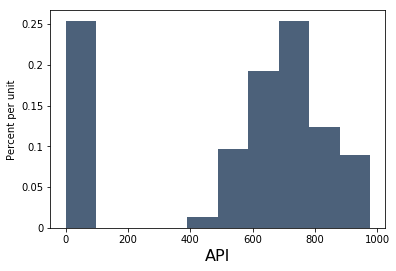

In [8]:
oakland_schools.select('API').hist()

By looking at the data values we can see that there are some schools with an API score of zero. This is because they are not participating in that evaluative program. Therefore, let's subset the data to remove these schools and then consider the geospatial distribution of the API ratings.

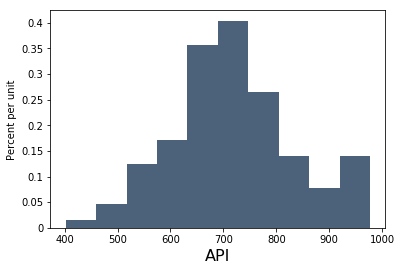

In [11]:
oakland_api = oakland_schools.where('API',are.above(0))
oakland_api.select('API').hist()

We now have the data to create a proportional map of the API value for each school where the point's area is a function of that data value.
<p>The challenge is to map the desired point symbol size to the data values.  
<p> We can do this with the function below that associates the range of data values to the range of desired symbol sizes.

In [9]:
def scaleSymbolSize(theData, dataVal, minRadius=10, maxRadius=300):
    """
    Scale symbol size between the range of min and max radii
    based on range of values in the input data. 
    Then use this radius to determine the output symbol AREA
    Returns the AREA for the symbol
    """
    valMin = min(theData)
    valMax = max(theData)
    valRange = (valMax - valMin )  
    symRange = (maxRadius - minRadius)  
    symbol_radius = (((dataVal - valMin) * symRange) / valRange) + minRadius
    symbol_area = symbol_radius * symbol_radius * math.pi  # Area of a circle = piR^2
    return int(symbol_area)

We can test the scaleSymbolSize function by passing in some data and the value for the symbol we want to scale. 
<p>For example, below we pass in the array of alameda_api['API'] scores and one particular value '900'.  
<p>The function will look at the range of values in this input data and calculate what symbol size to give for the value '900'.  We set our symbol min and max defaults to 10 and 300 respectively. 
<p> Since '900' is pretty close to the max API value we expect its symbol size to be close to the area of a circle with radius 300.

In [13]:
max(oakland_api['API'])

977

In [14]:
print("Area of my circle symbol for API of 900:", scaleSymbolSize(oakland_api['API'], 900))
print("Area of a circle symbol with radius of 300: %d" % (math.pi * math.pow(300,2))) # float to integar conversion

Area of my circle symbol for API of 900: 214279
Area of a circle symbol with radius of 300: 282743


It's kind of weird to think of circle symbol sizes in terms of areas rather than radii but it works :)

We can use the [apply](https://www.inferentialthinking.com/chapters/07/1/applying-a-function-to-a-column.html) Table method to calculate the radius for each API score in the oakland_api table. To do this we use a **lambda** function within the apply method to associated the table columns (below 'API') with the scaleSymbolSize function argument (dataval).


In [23]:
oakland_api['circle_area'] = oakland_api.apply(lambda x: scaleSymbolSize(oakland_api['API'], x, 10, 500), 'API')
oakland_api

X,Y,Site,Address,City,State,Type,API,Org,color,Type_order,circle_area
-122.227,37.7823,Achieve Academy,1700 28th Avenue,Oakland,CA,ES,788,Public,blue,1,360905
-122.186,37.7529,ACORN Woodland Elementary,1025 81st Avenue,Oakland,CA,ES,782,Public,blue,1,350098
-122.205,37.7887,Allendale Elementary,3670 Penniman Avenue,Oakland,CA,ES,744,Public,blue,1,285470
-122.222,37.774,ASCEND,3709 East 12th Street,Oakland,CA,ES,742,Public,blue,1,282251
-122.237,37.8005,Bella Vista Elementary,1025 East 28th Street,Oakland,CA,ES,811,Public,blue,1,403852
-122.207,37.7678,Bridges Academy,1325 53rd Avenue,Oakland,CA,ES,730,Public,blue,1,263321
-122.189,37.7348,Brookfield Elementary,401 Jones Avenue,Oakland,CA,ES,707,Public,blue,1,228874
-122.167,37.7755,Burckhalter Elementary,3994 Burckhalter Avenue,Oakland,CA,ES,790,Public,blue,1,364544
-122.174,37.7947,Carl B. Munck Elementary,11900 Campus Drive,Oakland,CA,ES,798,Public,blue,1,379281
-122.243,37.8503,Chabot Elementary,6686 Chabot Road,Oakland,CA,ES,932,Public,blue,1,669544


We can now pan and zoom on the map to exlore the low and high performing schools are based on their API score.



#### Circle.map_table Method

There is also a convenient **Circle.map_table** method for creating circle maps that requires less typing. This is shown below.

In [ ]:
Circle.map_table(oakland_api.select(['Y','X','Site','color','circle_area']), fill_opacity=.8)

Here are a few tips for using Circle.map_table. 

- You can use the **Table.select** method to create a new table "on-the-fly". We do that above with the statement 

> oakland_api.select(['Y','X','Site','color','circle_area'])

- The order in which the columns are listed in this Table.select must be *latitude*, *longitude*, *labels* (popup text), *colors*, and *areas*. All but latitude and longitude are optional.

- You can still use other parameters with this method after Table.select() such as radius (not areas), color (not colors), fill_opacity and fill_color.  This is demonstrated above with *fill_opacity=.8*

- There are more examples of the use of Circle.map_table in the rest of this notebook. If you find the syntax of Circle.map_table confusing you can always use Circle.map instead.


Now, let's update the popup content to include the API score so that we can better communicate the mapping of the symbol size to the API value.

In [22]:
def getPopupText(site, api):
    "Create custom popup content"
    the_text = ("%s, API Score: %d" % (site, api))
    return the_text

# Apply the function to the table
oakland_api['popup'] = oakland_api.apply(lambda x , y: getPopupText(x,y), 'Site','API')

# View the table
oakland_api

X,Y,Site,Address,City,State,Type,API,Org,radius,color,circle_area,popup
-122.227,37.7823,Achieve Academy,1700 28th Avenue,Oakland,CA,ES,788,Public,125663,blue,125663,"Achieve Academy, API Score: 788"
-122.186,37.7529,ACORN Woodland Elementary,1025 81st Avenue,Oakland,CA,ES,782,Public,125663,blue,125663,"ACORN Woodland Elementary, API Score: 782"
-122.205,37.7887,Allendale Elementary,3670 Penniman Avenue,Oakland,CA,ES,744,Public,70685,blue,125663,"Allendale Elementary, API Score: 744"
-122.222,37.774,ASCEND,3709 East 12th Street,Oakland,CA,ES,742,Public,70685,blue,125663,"ASCEND, API Score: 742"
-122.237,37.8005,Bella Vista Elementary,1025 East 28th Street,Oakland,CA,ES,811,Public,125663,blue,125663,"Bella Vista Elementary, API Score: 811"
-122.207,37.7678,Bridges Academy,1325 53rd Avenue,Oakland,CA,ES,730,Public,70685,blue,70685,"Bridges Academy, API Score: 730"
-122.189,37.7348,Brookfield Elementary,401 Jones Avenue,Oakland,CA,ES,707,Public,70685,blue,70685,"Brookfield Elementary, API Score: 707"
-122.167,37.7755,Burckhalter Elementary,3994 Burckhalter Avenue,Oakland,CA,ES,790,Public,125663,blue,125663,"Burckhalter Elementary, API Score: 790"
-122.174,37.7947,Carl B. Munck Elementary,11900 Campus Drive,Oakland,CA,ES,798,Public,125663,blue,125663,"Carl B. Munck Elementary, API Score: 798"
-122.243,37.8503,Chabot Elementary,6686 Chabot Road,Oakland,CA,ES,932,Public,196349,blue,196349,"Chabot Elementary, API Score: 932"


In [23]:
# Create the map
prop_map = Circle.map_table(oakland_api.select(['Y','X','popup','color','circle_area']), fill_opacity=.8)
prop_map

Now you can check those circle symbols to see if the larger circles are in fact associated with schools that have higher API scores.


### Problems with Proportional Symbol Maps

Proportional maps are great at identifying trends and outliers. However, because they represent the full range of data values, it is really hard to associate specific values with symbol sizes. For this reason **graduated symbol maps**, which group the data into 3-7 distinct classes, are often preferred.

Let's get started by first importing a function to create data groupings based on the different classification methods.

In [24]:
## Import some functions to create data class breaks, or intervals, based on different classification methods.
## The classification methods we will try are: equal interval, quantile, and Jenks.
from class_intervals_only import * 

### Classification Schemes
The classification method and number of classes greatly impact the visual display of the mapped data. Five classes is often considered the optimal number that can be easily differentiated by the human eye. The selection of classification method or scheme requires much more thought and is dependent on the data being visualized. 

Common classification methods that we will use include:

- **Equal interval** classification divides observations into N classes with equal data value ranges. For example, if your data values range from 0 to 50 and you have 5 classes, then the data will classed into the following bins: 0-10, 10-20, 20-30, 30-40, 40-50.
    - **Works great** if your data are well distributed across the full range of values. Also very easy to understand the bin mappings, or class breaks, and create comparisons accross time or data sets when using the same class breaks.
    - **Not so great** if your data area skewed or have outliers and/or only occupy a few of the classes.
    
    
- **Quantiles** classification places an equal number of observations in each class. For example, if you have 10 observations and 5 classes the data will be ordered by value from low to high and the first two values will go into the first class, etc.
    - **Works great** for creating good looking visualizations as it spreads the data values accross the range of symbology options. (good for linearly distributed data!)
    - **Not so great** if it creates artificial groupings in your data. The problem with quantiles is that you can end up with classes that have very different numerical ranges. Quantiles can also separate locations with very similar rates and group together places that have very different rates, which is very undesirable, so use the histogram to see if this is happening.


- **Jenks** classification tries to creating groupings that minimize within group variance and maximizes between group variance. Thus, it is called **natural breaks** classification and an *optimal* classifier.
    - **Works great** for visualiing the trends in the data.
    - **Not so great**: for understanding the rationale for the classes. Difficult to compare two maps as the range of symbols will be different as. One drawback of this approach is each dataset generates a unique classification solution, and if you need to make comparison across maps, such as in an atlas or a series (e.g., one map each for 1980, 1990, 2000) you might want to use a single scheme that can be applied across all of the maps.
    
    
- **Manual** classification is based on the data scientist's knowledge of the data.
    - Best if you want to compare maps so you can use the same classification scheme. Are there important break points that need to be “hardwired” into your class breaks? 

For a succinct discussion of data classification see: axismaps.com's [The Basics of Data Classification](http://www.axismaps.com/guide/classification/).

The following code demonstrates how to use the classification functions to identify the break points in your data.  By default, these functions return the breaks for 5 groupings.

In [25]:
# Classify the magnitude values into 5 classes using quantile breaks
my_classes = quantile(alameda_county_schools.where('API',are.above(0))['API']) 
my_classes =  [ '%d' % elem for elem in my_classes ]
print("Quantiles: ", my_classes)

my_classes = equal(alameda_county_schools.where('API',are.above(0))['API']) 
my_classes = [ '%d' % elem for elem in my_classes ]
print("Equal: ", my_classes)


my_classes = jenks(alameda_county_schools.where('API',are.above(0))['API']) 
my_classes = [ '%d' % elem for elem in my_classes ]
print("Jenks: ", my_classes)

Quantiles:  ['402', '694', '754', '814', '886', '993']
Equal:  ['402', '520', '638', '756', '874', '993']
Jenks:  ['402', '607', '704', '788', '879', '993']


The ouput of these classification functions is a list of values that denote the boundaries, or break points, for the data groups. You can see from the output above that different classifcation methods return different break points. Note that six break points are need to define 5 classes.

The quantile data groups, for example, will be:
1. 402 - 694
2. 694 - 754
3. 754 - 814
4. 812 - 886
5. 886 - 993

### Graduated Symbol Maps
Now that we have functions to define a set of break points to create class groups, we need to define the set of radii to associate with these groups. Since by default these classification methods create 5 groups, or classes, we need a set of 5 radii, one for each group.

In [26]:
# define a list of 5 radii, one for each of the 5 classes
symbol_radii = [50, 100, 150, 200, 250]

Above we manually determine a set of radii. We could do this with a function as well. 
<p> The values we choose for the radii will be highly dependent on the map scale. If we are zoomed way out, say to the state, country, or world we want really big radii values. If we are zoomed into a county or city we can use smaller values.

Next, we need a function to associate symbol these radii with the classes.  

In [27]:
def setSymbolSizeByClass(breaks, radii, dataval):
    """ Create a function to set symbol size, or radius, for a data value based on class breaks.
    Different size values work better at different zoom levels.
    """
    radius = 0
    
    if dataval <= breaks[1]:
        radius = radii[0]
    elif dataval <= breaks[2]:
        radius = radii[1]
    elif dataval <= breaks[3]:
        radius = radii[2]
    elif dataval <= breaks[4]:
        radius = radii[3]
    else:
        radius = radii[4]
    
    symbol_area = math.pow(radius,2) * math.pi  # Area of a circle = piR^2
    return int(symbol_area)

Let's run the code we have worked out so far to build our graduated symbol map.

In [28]:
# Define the class breaks
my_classes = quantile(oakland_api['API'])

# Take a look at the class breaks
print("Here are our class breaks:", [ '%d' % elem for elem in my_classes ])

# Print the radii
print("Here are the symbol radii", symbol_radii)

# Print here are the areas for each point in the table
print("Here is the radius of each point in the table:")
print(oakland_api.apply(lambda x: setSymbolSizeByClass(my_classes,symbol_radii, x), 'API'))

# Apply the setSymbolSizeByClass function to the table
oakland_api['circle_area'] = oakland_api.apply(lambda x: setSymbolSizeByClass(my_classes,symbol_radii, x), 'API')

# Set the same color for all features in the table
oakland_api['color'] = 'blue'

# Take a look at the table
oakland_api.show(5)

Here are our class breaks: ['402', '630', '686', '739', '812', '977']
Here are the symbol radii [50, 100, 150, 200, 250]
Here is the radius of each point in the table:
[125663 125663 125663 125663 125663  70685  70685 125663 125663 196349
 196349   7853 196349 125663  31415  31415  70685  70685  70685 196349
  31415  70685  70685  70685 196349   7853 196349 125663 196349  31415
 125663  70685   7853 125663   7853 196349 196349 196349  31415 125663
 125663  70685  70685 125663 196349  31415  70685  70685  70685  31415
 125663 125663 196349  70685 125663 196349 125663  31415   7853 196349
  70685  31415  31415 196349 125663 196349 196349 125663   7853 196349
 196349  31415  31415  31415  70685   7853 196349  31415   7853   7853
 125663  31415  31415 196349 196349  31415   7853   7853  70685  70685
  70685   7853   7853   7853   7853   7853   7853  31415  70685   7853
   7853   7853  31415  70685  70685  31415  31415   7853   7853  31415
 125663   7853]


X,Y,Site,Address,City,State,Type,API,Org,radius,color,circle_area,popup
-122.227,37.7823,Achieve Academy,1700 28th Avenue,Oakland,CA,ES,788,Public,125663,blue,125663,"Achieve Academy, API Score: 788"
-122.186,37.7529,ACORN Woodland Elementary,1025 81st Avenue,Oakland,CA,ES,782,Public,125663,blue,125663,"ACORN Woodland Elementary, API Score: 782"
-122.205,37.7887,Allendale Elementary,3670 Penniman Avenue,Oakland,CA,ES,744,Public,70685,blue,125663,"Allendale Elementary, API Score: 744"
-122.222,37.774,ASCEND,3709 East 12th Street,Oakland,CA,ES,742,Public,70685,blue,125663,"ASCEND, API Score: 742"
-122.237,37.8005,Bella Vista Elementary,1025 East 28th Street,Oakland,CA,ES,811,Public,125663,blue,125663,"Bella Vista Elementary, API Score: 811"


We are now ready to create our graduated symbol map of API scores for Oakland schoools as follows:

In [29]:
# Create the map
gradsym_map =Circle.map_table(oakland_api.select(['Y','X','popup','color','circle_area']), fill_opacity=1)
gradsym_map

Take a minute to compare the above **graduated color** map with the **proportional symbol** map we created previously (prop_map). Do you see a difference in the use of 5 different symbols sizes verses a continuous range of symbol sizes?


One problem with **quantile** and **equal interval** classification is that it can put data values that are very similar in different classes. For example, an API score of 811 is in a different class than 812. So on the map those schools would appear to be performing at different levels when in fact they are quite similar.

Let's try the **Jenks** classification method which is better at minimizing within group differences and maximizing between group differences. 
<p>
Because of this, **Jenks** is considered an "optimal" classifier.

In [30]:
# Define the class breaks
my_classes = jenks(oakland_api['API'])
print("Here are my Jenks classes: ", my_classes)

# Set the symbols radii
symbol_radii = [50, 100, 150, 200, 250]

#apply the radii to the table values
oakland_api['radius'] = oakland_api.apply(lambda x: setSymbolSizeByClass(my_classes,symbol_radii, x), 'API')

# Set the same color for all features in the table
oakland_api['color'] = 'blue'

# Draw the map
jenks_map = Circle.map_table(oakland_api.select(['Y','X','popup','color','radius']), fill_opacity=.8)
jenks_map

Here are my Jenks classes:  [402.0, 607, 694, 765, 864, 977.0]


Take a minute to consider the map based on Jenks vs. Quantile classification. What differences do you note?  Do they tell the same story about school performance? Does there now appear to be more or fewer high performing schools?  It's hard with all those circles so try focusing on one area at a time.

> **Challenge**

> Make a graduated symbol map of Oakland School API scores based on **equal interval** classification.

In [58]:
### SOLUTION BEGIN

# Define the class breaks
my_classes = equal(oakland_api['API'])
print("Here are my equal classes: ", my_classes)

# Set the symbols radii
symbol_radii = [50, 100, 150, 200, 250]

#apply the radii to the table values
oakland_api['circle_area'] = oakland_api.apply(lambda x: setSymbolSizeByClass(my_classes,symbol_radii, x), 'API')

# Set the same color for all features in the table
oakland_api['color'] = 'blue'

# Draw the map
equal_map = Circle.map_table(oakland_api.select(['Y','X','popup','color','circle_area']), fill_opacity=1)
equal_map

### SOLUTION END

Here are my equal classes:  [402.0, 517.0, 632.0, 747.0, 862.0, 977.0]


### Graduated Color Maps

Graduated color maps are an alternative to graduated symbol maps. As the name implies, instead of changing the symbol size, you change the symbol color. With these maps the choice of color palatte - *the range of colors associated with the data values* greatly impacts how the map will be interpretted.  
<p> There are two types of color palettes used for quantitiative data: (1) sequential and (2) diverging.  
<p>Sequential palettes use one or more colors to create the impression of low to high values based on the lightness, saturation, or hue, eg white to pinke to read. Diverging color schemes are good if you want to identify an average or median values by a neutral color (white, light yellow, grey) and then use brighter colors to idicate lwoer or higher values. Divergent color schemes are particularly helpful for identifying outliers.  For more on color palettes see [colorbrewer.org](http://colorbrewer.rog)

- For example, check out this [sequential color palette of purples and reds](http://colorbrewer2.org/?type=sequential&scheme=PuRd&n=5)

    - You can copy and paste the color values from colorbrewer.org by clicking on the **Export** tab and select the javascript array. See the screenshot below:
    
<img src="./colorbrewer_export.png" width="700"></img>
  
&nbsp;

Just like with graduated symbol maps, the first step is to define the set of breaks using a classification method. 
The difference is, that instead of identifying a set of radii for these classes, we use a different color for each class and keep the radius the same.

In [66]:
# Define a list of hexadecimal values for a sequential color palette
# We got these values by selecting a 5 color sequential palette from colorbrewer.org
symbol_colors = ("#d4b9da","#c994c7","#df65b0","#dd1c77","#980043")

Now, we need to define a function to associate the data values within our classes with specific colors.

In [64]:
def setSymbolColorByClass(breaks, colors, dataval):
    """Set symbol COLOR based on data values and class breaks
    """
    if dataval <= breaks[1]:
        return colors[0]
    
    elif dataval <= breaks[2]:
        return colors[1]
    
    elif dataval <= breaks[3]:
        return colors[2]
    
    elif dataval <= breaks[4]:
        return colors[3]
    
    else:
        return colors[4]

Below we use this function to create a **graduated color map** of Oakland API scores based on **Jenks** classification. We repeat the steps to keep it all together as our graduated color map recipe.

In [65]:
# Define the class breaks
my_classes = jenks(oakland_api['API'])

# Define a list of hexadecimal values for a sequential color palette
# We got these values by selecting a 5 color sequential palette from colorbrewer.org
symbol_colors = ("#d4b9da","#c994c7","#df65b0","#dd1c77","#980043")

# apply the setSymbolColorByClass function to the table
oakland_api['color'] = oakland_api.apply(lambda x: setSymbolColorByClass(my_classes, symbol_colors, x), 'API')

# Draw the map
Circle.map_table(oakland_api.select(['Y','X','popup','color']), radius=300, fill_opacity=1)


Take a minute to compare the Jenks **graduated color map** with the Jenks **graduated symbol map**. Which one do you think more effectively conveys differences in school performance based on API score?

> **Challenge**

> Redo the above graduated color map based on equal interval classification. Change the color palette to a **diverging** palette that highlights low performing schools in red and high performing schools in green.

In [62]:
### SOLUTION BEGIN

# Define the class breaks
my_classes = equal(oakland_api['API'])

# Define a list of hexadecimal values for a sequential color palette
# We got these values by selecting a 5 color sequential palette from colorbrewer.org
symbol_colors = ['#d7191c','#fdae61','#ffffbf','#a6d96a','#1a9641']

# apply the setSymbolColorByClass function to the table
oakland_api['color'] = oakland_api.apply(lambda x: setSymbolColorByClass(my_classes, symbol_colors, x), 'API')


# Draw the map
Circle.map_table(oakland_api.select(['Y','X','popup','color']), radius=300, fill_opacity=1)

### SOLUTION END

### Bivariate Point Maps

We can combine category and graduated symbol maps to create a bivariate point map. One way to do this would be to set the value of *color* in the oakland_api table based on school type (ES, MS or HS) and the radius based on API score, using one of the classification methods. Try that in the cell below.

In [ ]:
### SOLUTION BEGIN

# symbol color based on school type
oakland_api['color'] = 'black' # default color
oakland_api['color'][oakland_api['Type']=='HS'] = 'red'   # High schools
oakland_api['color'][oakland_api['Type']=='MS'] = 'green' # Middle Schools
oakland_api['color'][oakland_api['Type']=='ES'] = 'blue'  # Elementary Schools

# symbol size based on API value
my_classes = equal(oakland_api['API'])
oakland_api['circle_area'] = oakland_api.apply(lambda x: setSymbolSizeByClass(my_classes, symbol_radii, x), 'API')

# create map
Circle.map_table((oakland_api).select(['Y','X','popup','color','circle_area']), fill_opacity=1)

### SOLUTION END

Zoom in on the bivarate map. Can you tell which type of schools (elementary or middle or high schools) tend to have the lowest API scores?
